## L2D Assignment - Machine Learning 2:

This notebook contains your assignment questions for the **Improvement** lesson. Please attempt and complete all questions. The topics this assignment will assess are:

1. Improvement


When you have completed your assignment, please commit the changes to your GitHub repository's 'Assignments' folder, as instructed in the [Assignments section](https://learntodiscover.github.io/L2D-Handbook/section7.html) of the [L2D Handbook](https://learntodiscover.github.io/L2D-Handbook).



Take the torus-within-a-torus data generator from the Challenge in the lesson.


1. Create data with three features and a noise level of 0.3.

In [ ]:
# Import all the needed functions for this task 

from numpy import arange
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from matplotlib.pyplot import subplots, axes, scatter, xticks
from numpy import mgrid, linspace, c_, arange, mean, array, full, zeros, vstack, pi, cos, sin, append, ones, zeros, hstack, vstack, intp

from numpy.random import uniform, seed
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state, shuffle

from matplotlib.pyplot import subplots,figure,barh
from numpy.random import uniform
from matplotlib.pyplot import subplots, axes

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# WL: Correct import statements, specifically importing necessary NumPy functions.
# WL: Correct import of matplotlib functions, as demonstrated in ML2 lesson, supporting 3-D data visualisation.


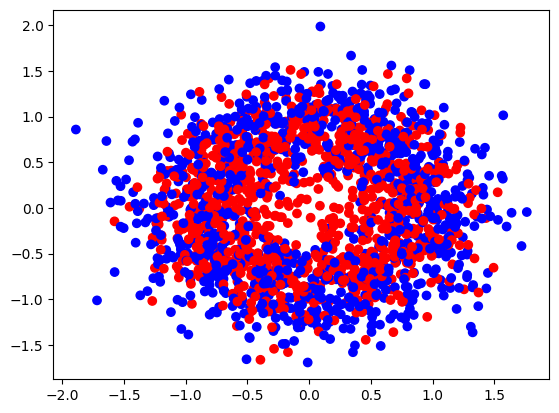

In [ ]:
# Create the data with three features, setting the noise level to 0.3

samples = 2000

# Use the "make_circles" function to visually represnt the data 

X, y = make_circles(n_samples=samples, factor= 0.8 , noise=0.3)

# Plot the data points 

fig, ax = subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr');



2. Create a pseudo-3D scatter plot of one of the test data sets to judge the difficulty of the task.

In [ ]:
# Define the Torus function to later on use it for the creation of 3D data
# Set the parameters of the function to the same paramenters as of the above created data 

def make_torus_3D(n_samples=samples , shuffle=True, noise=0.3, random_state=None,
                 factor=0.8):
 
    from numpy import pi, linspace, cos, sin, append, ones, zeros, hstack, vstack, intp
    from sklearn.utils import check_random_state, shuffle
    
    if factor >= 1 or factor < 0:
        raise ValueError("'factor' has to be between 0 and 1.")

    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    co, ao, ci, ai = 3, 1, 5, 0.3
    generator = check_random_state(random_state)
    
    mod_freq = 31
    
    # to not have the first point = last point, we set endpoint=False
    linspace_out = linspace(0, 2 * pi, n_samples_out, endpoint=False)
    linspace_in  = linspace(0, 2 * pi, n_samples_in,  endpoint=False)
    outer_circ_x = (co+ao*cos(linspace_out)) * cos(linspace_out*mod_freq)
    outer_circ_y = (co+ao*cos(linspace_out)) * sin(linspace_out*mod_freq)
    outer_circ_z =    ao*sin(linspace_out)
    
    inner_circ_x = (ci+ai*cos(linspace_in)) * cos(linspace_in*mod_freq) * factor
    inner_circ_y = (ci+ai*cos(linspace_in)) * sin(linspace_in*mod_freq) * factor
    inner_circ_z =    ai*sin(linspace_in) * factor

    X = vstack([append(outer_circ_x, inner_circ_x),
                append(outer_circ_y, inner_circ_y),
                append(outer_circ_z, inner_circ_z)]).T
            
    y = hstack([zeros(n_samples_out, dtype=intp),
                   ones(n_samples_in, dtype=intp)])
    
    
    if shuffle:
        X, y = shuffle(X, y, random_state=generator)

    if noise is not None:
        X += generator.normal(scale=noise, size=X.shape)

    return X, y


# WL: Correct definition of make_torus_3D function, as used in ML2 lesson materials.
# WL: Correct generation of toroidal dataset using defined function: data are used to demonstrate ML2 classification and clustering techniques.
# WL: Correct return of feature matrix / 3-D coordinates as X, and class membership (integers 0 or 1) as y.

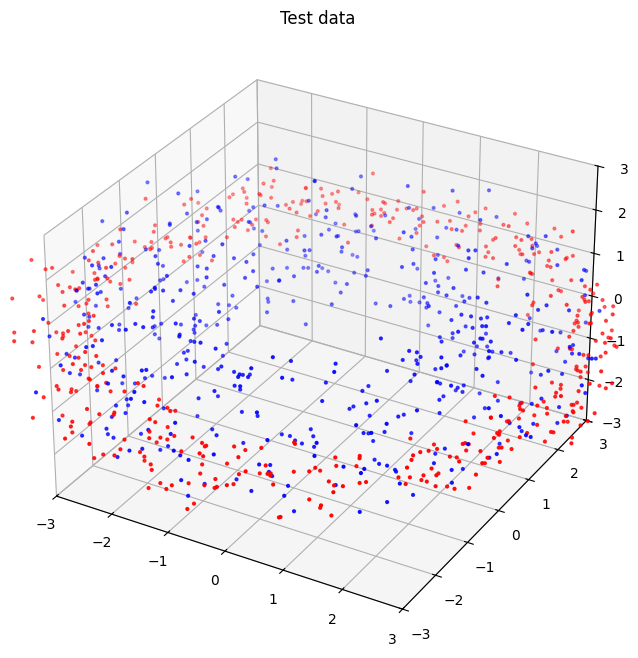

In [ ]:
# Call the earlier created function to execute the plotting of a 3D scatter 

X, y = make_torus_3D()

# Split the data into "test" and "training" sets using the "train_test_split" function 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, shuffle=True)

# Visualy represent the plot

fig, ax = subplots(figsize=(8, 8), subplot_kw ={'projection':'3d'})
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, s=4, cmap='bwr')
ax.set_title('Test data')

# Define the parameters of x and y axis 

ax.set_ylim([-3, 3])
ax.set_xlim([-3, 3])
ax.set_zlim([-3, 3])

# Show the plot 

plt.show()

# WL: Correct import statements from sci-kit learn and its associated sub-libraries of classifiers, data splitting and evaluation.
# WL: Correct import of Random Forest, Extra Trees and additional classifiers, as demonstrated in ML2 lesson materials.
# WL: Correct storage of '123' integer into RANDOM_STATE variable, for reproducibility of results.
# WL: Correct creation of classifier dictionary containing keys and instantiated classifier objects.
# WL: Correct provision of keys of string data that sufficiently describe instantiated classifiers and model type. 
# WL: Correct attribution of these keys to the classifer, and modulation of each classifier as demonstrated in ML2 materials, to include
# WL: random_state keyword argument set to value of '123', for consistency.
# WL: Correct use of max_iter keyword argument in MLP Classifier instantiation, to limit the number of iterations.
# WL: Correct gamut of classifiers used, as demonstrated in ML2 lesson.
# WL: Classifiers all correctly instantiated as demonstrated in ML2 lesson materials.

3. Train the above introduced classifiers using the stratified shuffle split to generate 10 sets of testing and training data and obtain the average score for each classifier.

In [32]:
# Identify the parameters of the stratified shuffle function 

n_splits  = 10

test_size = 10

train_size = 10

RANDOM_STATE = 123

sss = StratifiedShuffleSplit(n_splits=n_splits, 
                             test_size=test_size,
                             train_size=train_size,
                             random_state=RANDOM_STATE)

# Split data using the earlier set up of the stratified shuffle function 

split_data_indices = sss.split(X=X, y=y)

In [ ]:
# Check that the "test" and "training" sets are of the correct number of 10 

for index, (tr, tt) in enumerate(split_data_indices):

    if index == 9:
        
        print('Index', index, 'Train samples:', tr, 'Test samples:', tt, sep='\n\n')

    indices = X[:, 0].copy()
    indices[tt] = 1
    indices[tr] = 0

    # Visualize the results
    x_axis = arange(indices.size)
    y_axis = [index + .5] * indices.size
    ax.scatter(x_axis, y_axis, c=indices, WL='_', lw=30, cmap='gray', vmin=-.1, vmax=1.1)

print('')



Index

9

Train samples:

[1305   77  599 1555 1823  163  342 1413  239  534]

Test samples

[ 345   14  327  731  305 1686 1353 1689  612 1132]



In [ ]:
# Identify the parameters of the seed function 
# Create a dictionary which will contain all the classifiers needed for later 

seed(RANDOM_STATE)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)
}

# WL: Correct import statements from sci-kit learn and its associated sub-libraries of classifiers, data splitting and evaluation.
# WL: Correct import of Random Forest, Extra Trees and additional classifiers, as demonstrated in ML2 lesson materials.
# WL: Correct storage of '123' integer into RANDOM_STATE variable, for reproducibility of results.
# WL: Correct creation of classifier dictionary containing keys and instantiated classifier objects.
# WL: Correct provision of keys of string data that sufficiently describe instantiated classifiers and model type. 
# WL: Correct attribution of these keys to the classifer, and modulation of each classifier as demonstrated in ML2 materials, to include
# WL: random_state keyword argument set to value of '123', for consistency.
# WL: Correct use of max_iter keyword argument in MLP Classifier instantiation, to limit the number of iterations.
# WL: Correct gamut of classifiers used, as demonstrated in ML2 lesson.
# WL: Classifiers all correctly instantiated as demonstrated in ML2 lesson materials.

In [ ]:
# Define the feature range 
ft_min, ft_max = -1.5, 1.5

# Construct (2 grids x 300 rows x 300 cols)
grid_1, grid_2 = mgrid[ft_min:ft_max:.01, ft_min:ft_max:.01] 

# As the above induced classifier has been trained on the 3D data, a dummy feature is needed in order to 
# visualize decision bounderies in 2D (othervise an error will be given)
dummy_feature = mean(X[:, 2])

# We need only the shape for one of the grids (i.e. 300 x  300):
grid_shape = grid_1.shape

# Add the earlier created dummy feature to create a 3D imput
new_obs = c_[grid_1.ravel(), grid_2.ravel(),full(grid_1.ravel().shape, dummy_feature)]

/opt/conda/envs/l2dVE/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/l2dVE/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


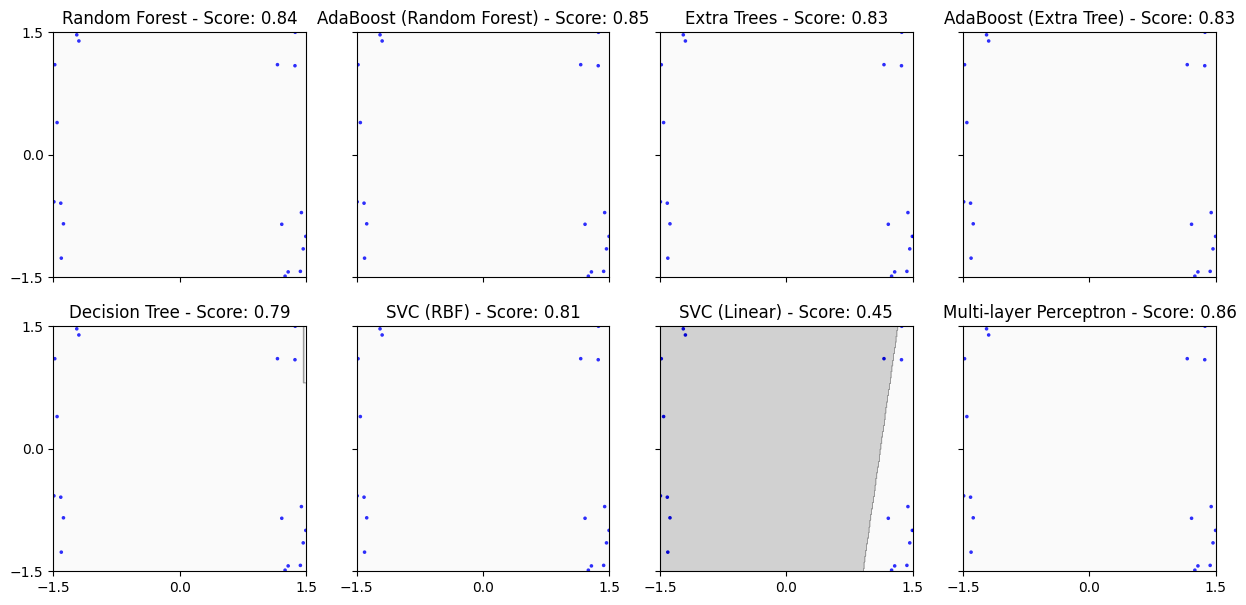

In [ ]:
# Set subplots for visualisation 

fig, all_axes = subplots(figsize=[15, 7], ncols=4, nrows=2, sharey=True, sharex=True)

contour_levels = linspace(0, 1, 6)

# Using a loop run through all classifier models to visualy represent the data plots 

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):

    # Training the model usig 3D training data 

    clf.fit(X_train, y_train)

    # Predict on the 2D grid using the dummy feature 

    y_pred      = clf.predict(new_obs)
    y_pred_grid = y_pred.reshape(grid_shape)

    # Evaluate the score using test data
    
    score = clf.score(X_test, y_test)

    # Scatter the test data only  

    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=10, cmap='bwr', WL='.')

    # Plot the decision boundary 

    ax.contourf(grid_1, grid_2, y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels)

    # Set title with classifier name and score 

    ax.set_ylim(ft_min, ft_max)
    ax.set_xlim(ft_min, ft_max)
    ax.set_yticks([-1.5, 0, 1.5])
    ax.set_xticks([-1.5, 0, 1.5])

    # Show the figure

    label = '{} - Score: {:.2f}'.format(name, score)
    ax.set_title(label , fontsize=12);


4. Plot the feature importances obtained from the Random Forest classifier to see the contributions of each feature to the outcome.

Note that with 3 or more features it is no longer possible to see the full state space in a plane.


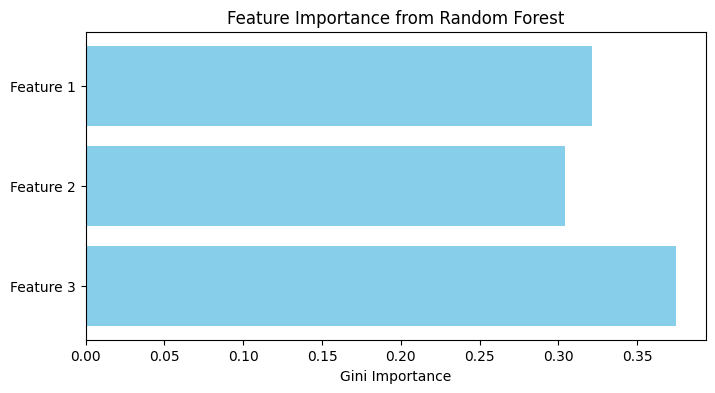

In [ ]:
# Call from the earlier created dictionary the Random Forest classifier 

random_forest = classifiers["Random Forest"]

# Train the Random Forest classifier 

random_forest.fit(X_train, y_train)

# Using feature_importances_ function, extract feature importances 

feature_importances = random_forest.feature_importances_

# For visual clearance, define feature names 

feature_names = [f"Feature {i+1}" for i in range(len(feature_importances))]

# Plot the feature importances bar 

plt.figure(figsize=(8, 4))
plt.barh(feature_names, feature_importances, color='skyblue')

# Built-in feature importance (Gini Importance)

plt.xlabel('Gini Importance')
plt.title('Feature Importance from Random Forest')

# Invert y-axis for better visualization

plt.gca().invert_yaxis() 
plt.show()

# WL: Correct use of .feature_importances_ attribute to calculate relative importance of each feature in RF model. Storage in aptly named variable.
# WL: Correct storage of these importances as percentages, using formatted string. 
# WL: Correct use of print function to display desired output.
# WL: Correct use of arange to aid in binning for each feature, in the resulting bar chart.
# WL: Correct use of matplotlib to generate bar chart showing feature importances.
# WL: Correct use of show() function to display final figure.


5. Optional: Check how the outcome varies depending on

- Choice of seed for random number generator
- Number of data splits
- Percentage of data withheld for testing

```
## Recommendation

Pick any of the provided (or other) data sets with labels to repeat the above. Feel free to try and do any testing or plotting that you find important. This is not an assignment to get the correct answer. Rather at this stage, we practise to use functionality from SciKit-learn to search for structure in the data that helps to achieve the best predictions possible.
```


1. How the outcome varies depending on:

- Choice of seed for random number generator

In [38]:

n_splits  = 10

test_size = 10

train_size = 10

RANDOM_STATE = 123

sss = StratifiedShuffleSplit(n_splits=n_splits, 
                             test_size=test_size,
                             train_size=train_size,
                             random_state=RANDOM_STATE)

In [39]:

RANDOM_STATE_seed = 989
seed(RANDOM_STATE_seed)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)}

In [40]:
ft_min, ft_max = -1.5, 1.5

# Constructing (2 grids x 300 rows x 300 cols):
grid_1, grid_2 = mgrid[ft_min:ft_max:.01, ft_min:ft_max:.01] 

dummy_feature = mean(X[:, 2])

# We need only the shape for one of the grids (i.e. 300 x  300):
grid_shape = grid_1.shape

# state space grid for testing
new_obs = c_[grid_1.ravel(), grid_2.ravel(),full(grid_1.ravel().shape, dummy_feature)]

/opt/conda/envs/l2dVE/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


/opt/conda/envs/l2dVE/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


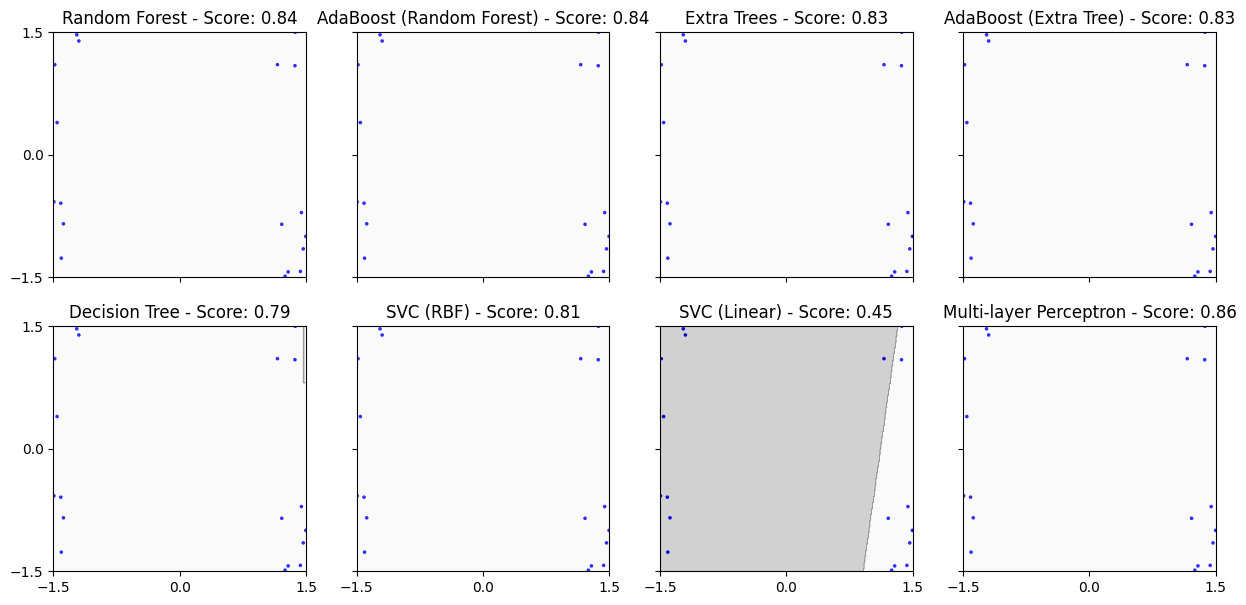

In [ ]:
split_data_indices = sss.split(X=X, y=y)

fig, all_axes = subplots(figsize=[15, 7], ncols=4, nrows=2, sharey=True, sharex=True)

contour_levels = linspace(0, 1, 6)

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):
    # Training the model using training data:     
    clf.fit(X_train, y_train)

    y_pred      = clf.predict(new_obs)
    y_pred_grid = y_pred.reshape(grid_shape)

    # Evaluating the score using test data:
    score = clf.score(X_test, y_test)

    # Scattering the test data only:     
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=10, cmap='bwr', WL='.')

    ax.contourf(grid_1, grid_2, y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels)

    ax.set_ylim(ft_min, ft_max)
    ax.set_xlim(ft_min, ft_max)
    ax.set_yticks([-1.5, 0, 1.5])
    ax.set_xticks([-1.5, 0, 1.5])

    label = '{} - Score: {:.2f}'.format(name, score)
    ax.set_title(label , fontsize=12);


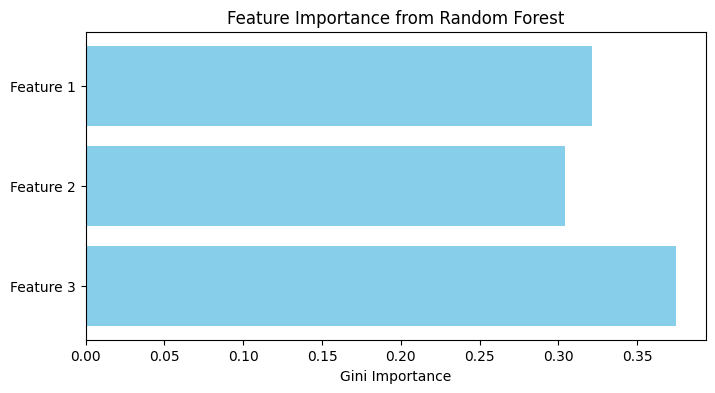

In [42]:
random_forest = classifiers["Random Forest"]
random_forest.fit(X_train, y_train)
feature_importances = random_forest.feature_importances_
feature_names = [f"Feature {i+1}" for i in range(len(feature_importances))]
plt.figure(figsize=(8, 4))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


2. How the outcome varies depending on:

- Number of data splits




In [44]:

from sklearn.model_selection import StratifiedShuffleSplit

n_splits  = 100

test_size = 10

train_size = 10

RANDOM_STATE = 123

sss = StratifiedShuffleSplit(n_splits=n_splits, 
                             test_size=test_size,
                             train_size=train_size,
                             random_state=RANDOM_STATE)

In [45]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


seed(RANDOM_STATE)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)}

In [46]:
ft_min, ft_max = -1.5, 1.5

# Constructing (2 grids x 300 rows x 300 cols):
grid_1, grid_2 = mgrid[ft_min:ft_max:.01, ft_min:ft_max:.01] 

dummy_feature = mean(X[:, 2])

# We need only the shape for one of the grids (i.e. 300 x  300):
grid_shape = grid_1.shape

# state space grid for testing
new_obs = c_[grid_1.ravel(), grid_2.ravel(),full(grid_1.ravel().shape, dummy_feature)]

/opt/conda/envs/l2dVE/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/l2dVE/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


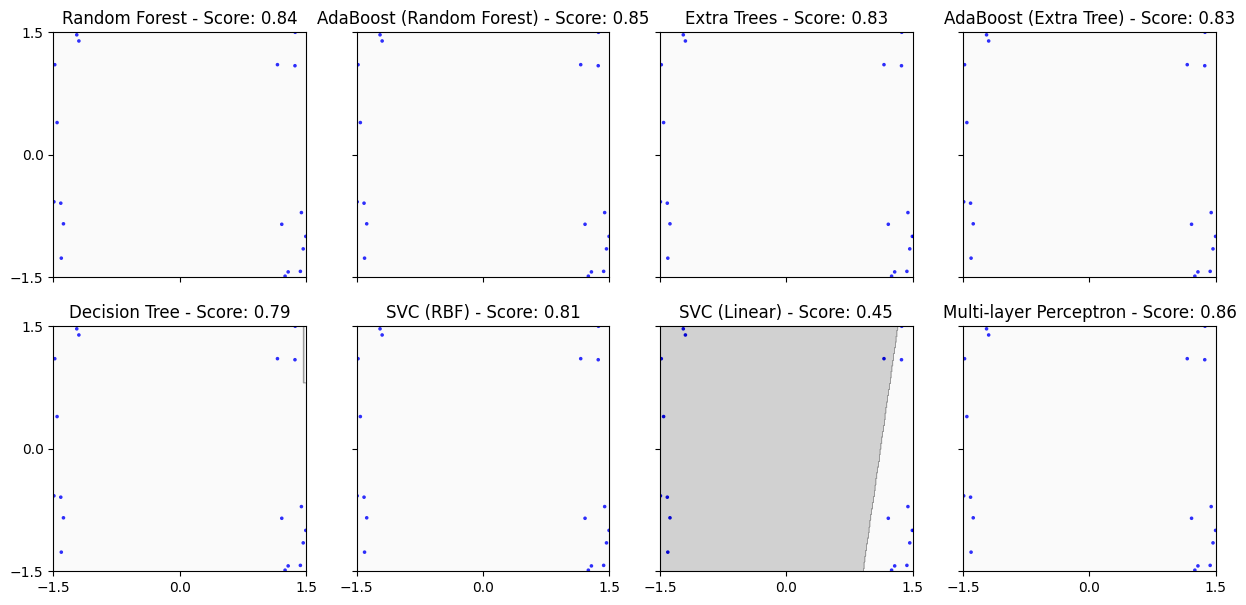

In [ ]:
split_data_indices = sss.split(X=X, y=y)

fig, all_axes = subplots(figsize=[15, 7], ncols=4, nrows=2, sharey=True, sharex=True)

contour_levels = linspace(0, 1, 6)

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):
    # Training the model using training data:     
    clf.fit(X_train, y_train)

    y_pred      = clf.predict(new_obs)
    y_pred_grid = y_pred.reshape(grid_shape)

    # Evaluating the score using test data:
    score = clf.score(X_test, y_test)

    # Scattering the test data only:     
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=10, cmap='bwr', WL='.')

    ax.contourf(grid_1, grid_2, y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels)

    ax.set_ylim(ft_min, ft_max)
    ax.set_xlim(ft_min, ft_max)
    ax.set_yticks([-1.5, 0, 1.5])
    ax.set_xticks([-1.5, 0, 1.5])

    label = '{} - Score: {:.2f}'.format(name, score)
    ax.set_title(label , fontsize=12);


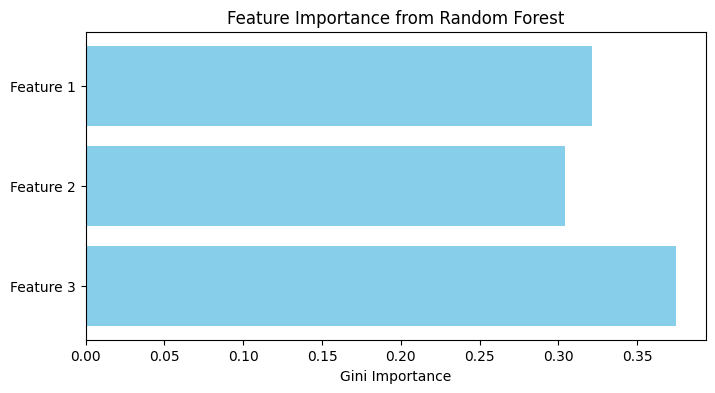

In [20]:
random_forest = classifiers["Random Forest"]
random_forest.fit(X_train, y_train)
feature_importances = random_forest.feature_importances_
feature_names = [f"Feature {i+1}" for i in range(len(feature_importances))]
plt.figure(figsize=(8, 4))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


3. How the outcome varies depending on:

- Percentage of data withheld for testing

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

n_splits  = 10

test_size = 80

RANDOM_STATE = 123

sss = StratifiedShuffleSplit(n_splits=n_splits, 
                             test_size=test_size,
                             random_state=RANDOM_STATE)

In [73]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

seed(RANDOM_STATE)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)
}


In [74]:
ft_min, ft_max = -1.5, 1.5

# Constructing (2 grids x 300 rows x 300 cols):
grid_1, grid_2 = mgrid[ft_min:ft_max:.01, ft_min:ft_max:.01] 

dummy_feature = mean(X[:, 2])

# We need only the shape for one of the grids (i.e. 300 x  300):
grid_shape = grid_1.shape

# state space grid for testing
new_obs = c_[grid_1.ravel(), grid_2.ravel(),full(grid_1.ravel().shape, dummy_feature)]

/opt/conda/envs/l2dVE/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/l2dVE/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


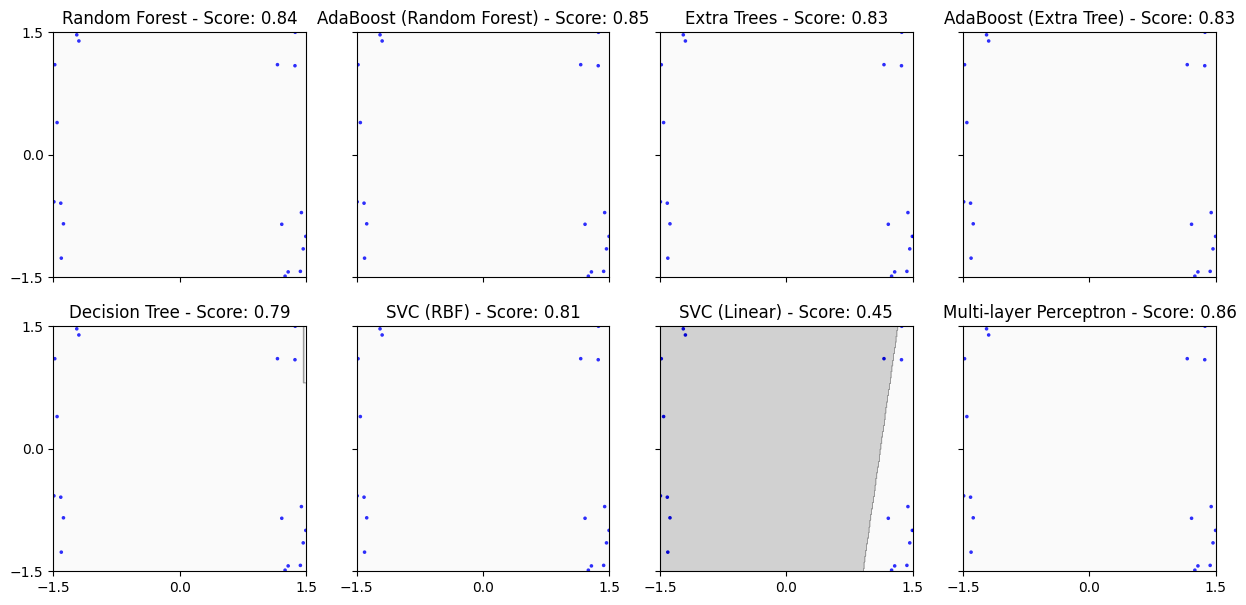

In [ ]:
split_data_indices = sss.split(X=X, y=y)

fig, all_axes = subplots(figsize=[15, 7], ncols=4, nrows=2, sharey=True, sharex=True)

contour_levels = linspace(0, 1, 6)

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):
    # Training the model using training data:     
    clf.fit(X_train, y_train)

    y_pred      = clf.predict(new_obs)
    y_pred_grid = y_pred.reshape(grid_shape)

    # Evaluating the score using test data:
    score = clf.score(X_test, y_test)

    # Scattering the test data only:     
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=10, cmap='bwr', WL='.')

    ax.contourf(grid_1, grid_2, y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels)

    ax.set_ylim(ft_min, ft_max)
    ax.set_xlim(ft_min, ft_max)
    ax.set_yticks([-1.5, 0, 1.5])
    ax.set_xticks([-1.5, 0, 1.5])

    label = '{} - Score: {:.2f}'.format(name, score)
    ax.set_title(label , fontsize=12);


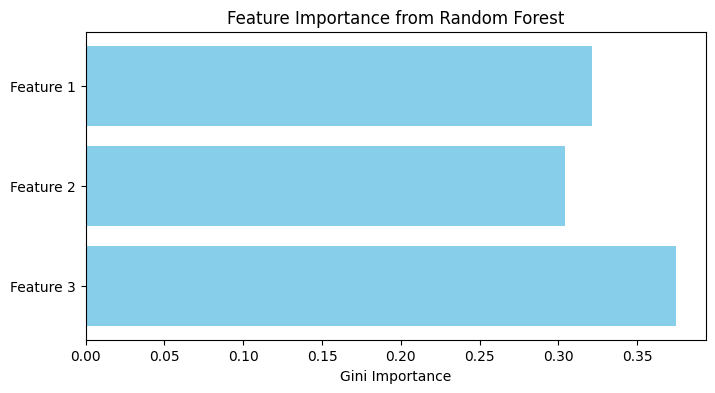

In [ ]:
random_forest = classifiers["Random Forest"]
random_forest.fit(X_train, y_train)
feature_importances = random_forest.feature_importances_
feature_names = [f"Feature {i+1}" for i in range(len(feature_importances))]
plt.figure(figsize=(8, 4))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

Unfortunately, couldn't see any score or visually significant changes upon changing the parameters of the three chosen features.

In [ ]:
# WL: An excellent assignment - very well done!